# Initialization and Data Loading

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [3]:
spotify_df=pd.read_csv('spotify_dataset.csv')
spotify_df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [4]:
spotify_df[["valence","energy"]].head()

,valence,energy
0,0.715,0.4610
1,0.267,0.1660
2,0.120,0.3590
3,0.143,0.0596
4,0.167,0.4430


# K-Means Clustering

Here, the StandardScaler wasn't used cause valence and energy already have the same scales

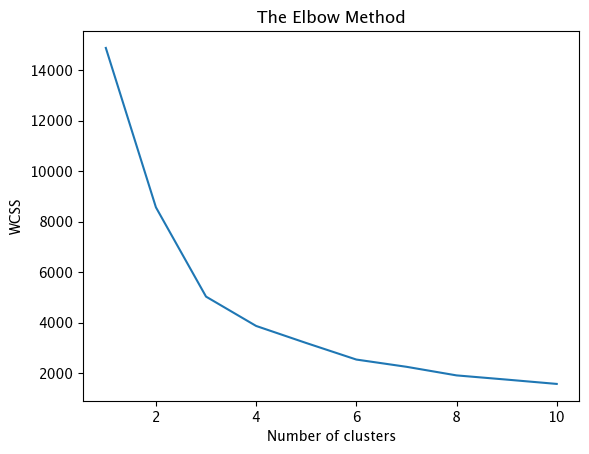

In [5]:
X = spotify_df[['valence', 'energy']]
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

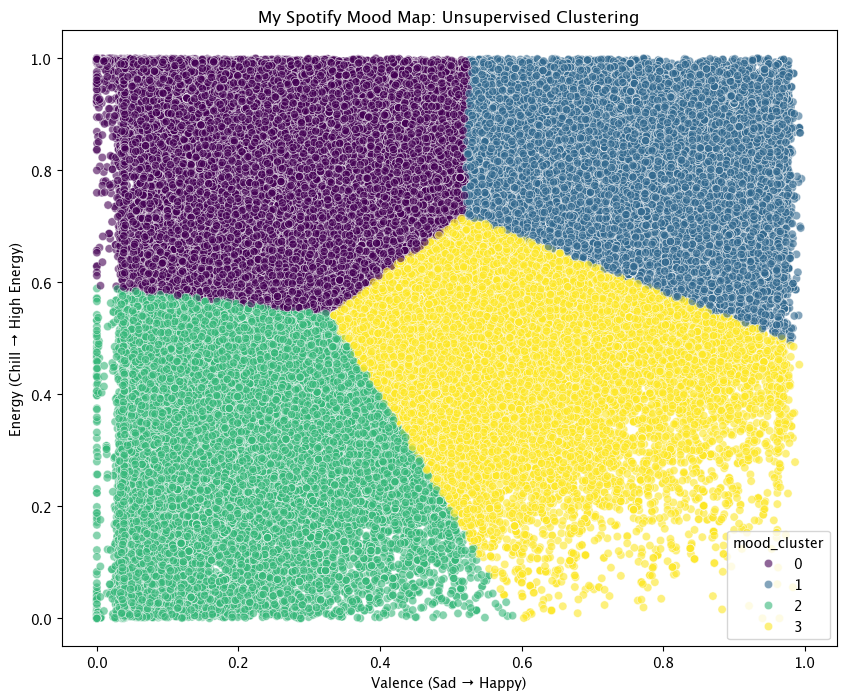

In [7]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
spotify_df['mood_cluster'] = kmeans.fit_predict(X)

# Plotting the result
plt.figure(figsize=(10, 8))
sns.scatterplot(data=spotify_df, x='valence', y='energy', hue='mood_cluster', palette='viridis', alpha=0.6)
plt.title('My Spotify Mood Map: Unsupervised Clustering')
plt.xlabel('Valence (Sad → Happy)')
plt.ylabel('Energy (Chill → High Energy)')
plt.show()